# Sparse Dreams: Sparse Coding & Wake-Sleep Algorithm

In [199]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import scipy
from scipy import ndimage
import math
from tqdm import tqdm

# See helmholtz.py and sparse_coding.py
import helmholtz as hm
from sparse_coding import calc_LCA, calc_Phi, SparseCodingModel

# To Delete Later
import tensorflow as tf
from sklearn.datasets import fetch_olivetti_faces

# Load Raw Images

In [264]:
def contrast_images(images):
    return images**2

def blur_images(images, scale=3):
    return np.array([ndimage.gaussian_filter(img, scale) for img in images])
    
def sharpen_images(images, scale=5):
    return np.array([img + scale * (img - ndimage.gaussian_filter(img, 1)) for img in images])

def get_face_images(num_images=5):
    faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)
    n_samples, n_features = faces.shape
    image_shape = (64, 64)
    # global centering
    faces_centered = faces - faces.mean(axis=0)
    # local centering
    faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)
    return faces_centered[:num_images], image_shape

# Gets MNIST images for a given number. (ie. if number=1, all images of 1 are returned)
# def get_mnist_images(number=1, num_images=5):
#     (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#     # X = (np.concatenate((x_train, x_test), axis = 0).reshape((len(x_train)+len(x_test), 28*28)) > .5).astype(float)
#     X = ((np.concatenate((x_train, x_test), axis = 0))).astype(float) 
#     y = np.concatenate((y_train, y_test), axis = 0)
#     print(X.shape, y.shape)

#     # Isolate Ones
#     digit = X[np.where(y == 8)]
#     digit = (digit.reshape((len(digit), 1, 28*28))).astype(float)
#     print(digit.shape)
#     plt.imshow(digit.reshape((len(digit),28,28))[0]/255, cmap='gray')
#     plt.show()

# Create Sparse Coding Model

In [321]:
num_images=5
n_activations = 32
alpha = 0.001
num_steps = 1000
get_images = get_face_images
do_contrast = True
test_train_ratio = .5

images, image_shape = get_images(num_images=num_images)
input_size = image_shape[0]*image_shape[1]
if (do_contrast):
    images = contrast_images(images)
#     images = sharpen_images(images)
#     images = blur_images(images)
test_train_split = int(num_images*test_train_ratio)
X_train, X_test = images[:test_train_split], images[test_train_split:]

model = SparseCodingModel(input_size, n_activations, alpha)
model.train(X_train, alpha, num_steps)

100% (1000 of 1000) |####################| Elapsed Time: 0:02:59 Time:  0:02:59


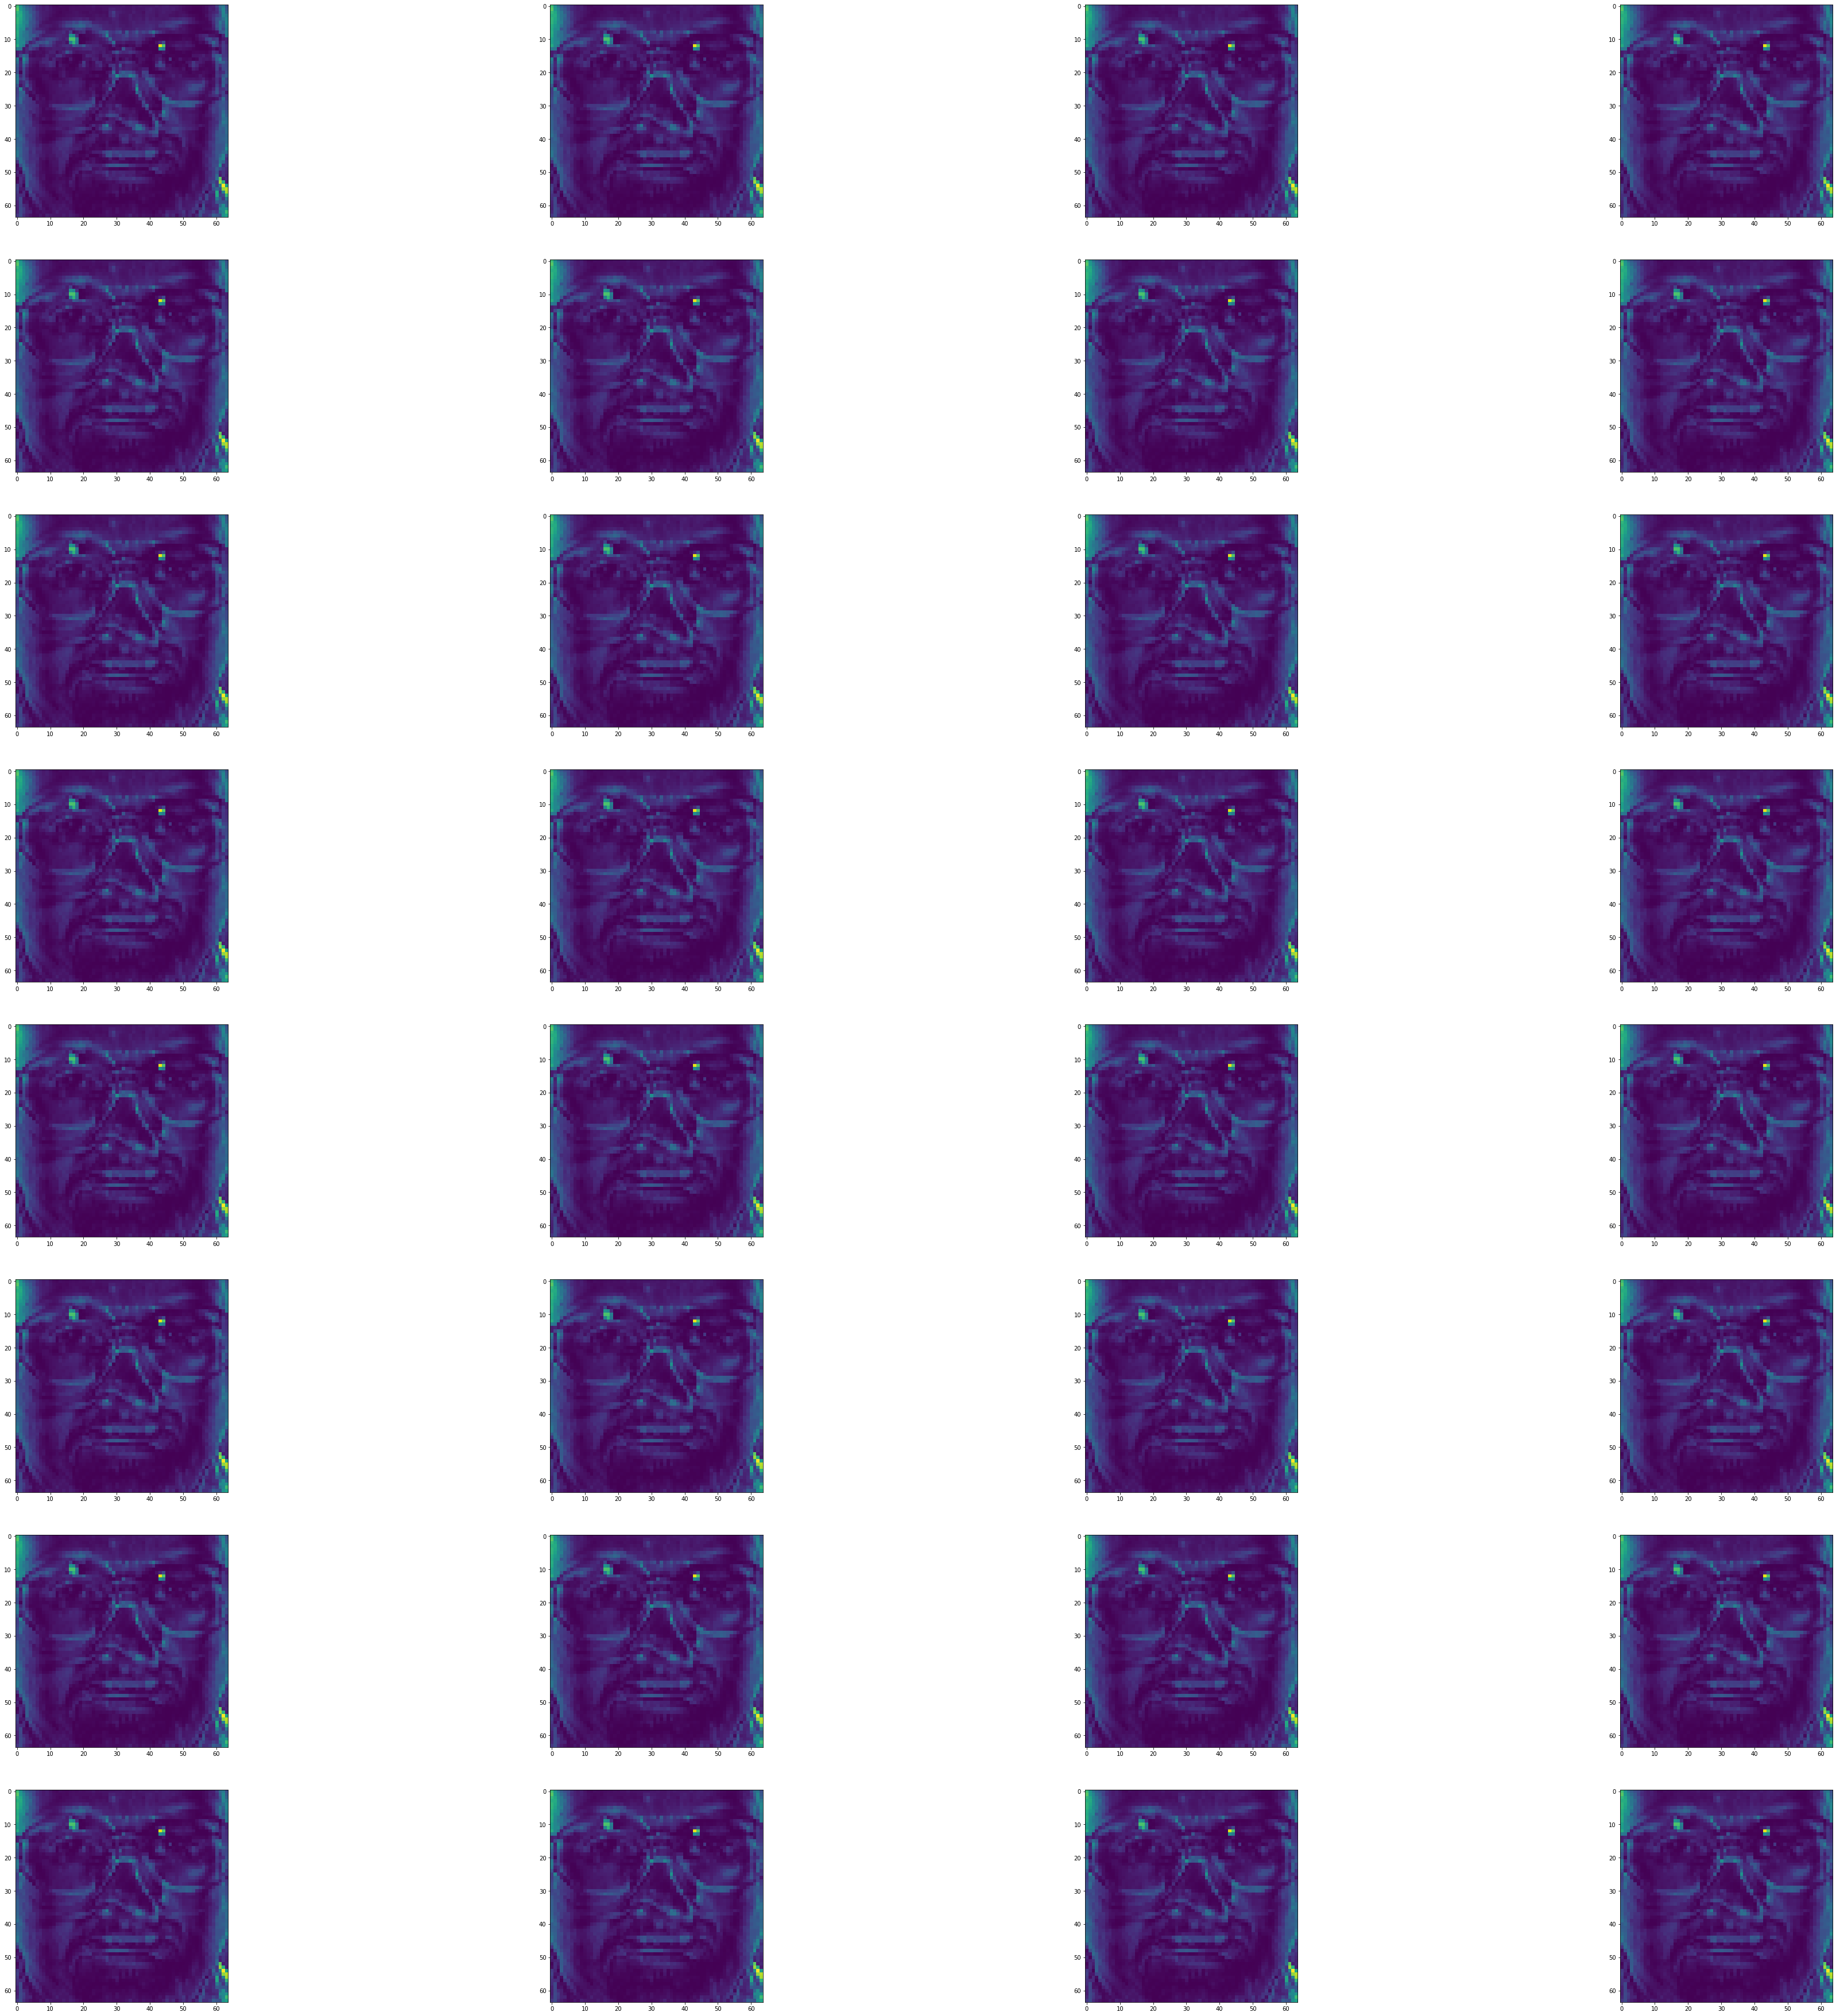

In [322]:
# Feature Library
fig=plt.figure(figsize=image_shape)
columns = 4
rows = 8
for i in range(n_activations):
    img = model.Phi[:, i].reshape(image_shape)
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(img)
plt.show()

In [323]:
# Predict Activations From Test Images
activations = model.predict(X_test, num_steps=num_steps)

# Generate Images from Activations
X_pred = model.generate(activations)

In [324]:
X_test.shape

(3, 4096)

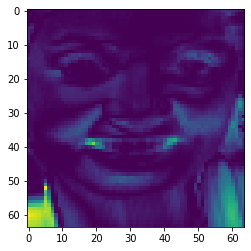

In [325]:
plt.imshow(X_test[0].reshape(image_shape))

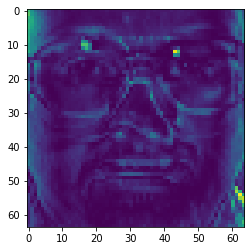

In [326]:
plt.imshow(X_pred[:, 0].reshape(image_shape))

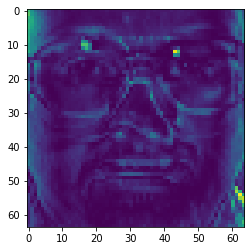

In [327]:
plt.imshow(X_pred[:, 1].reshape(image_shape))

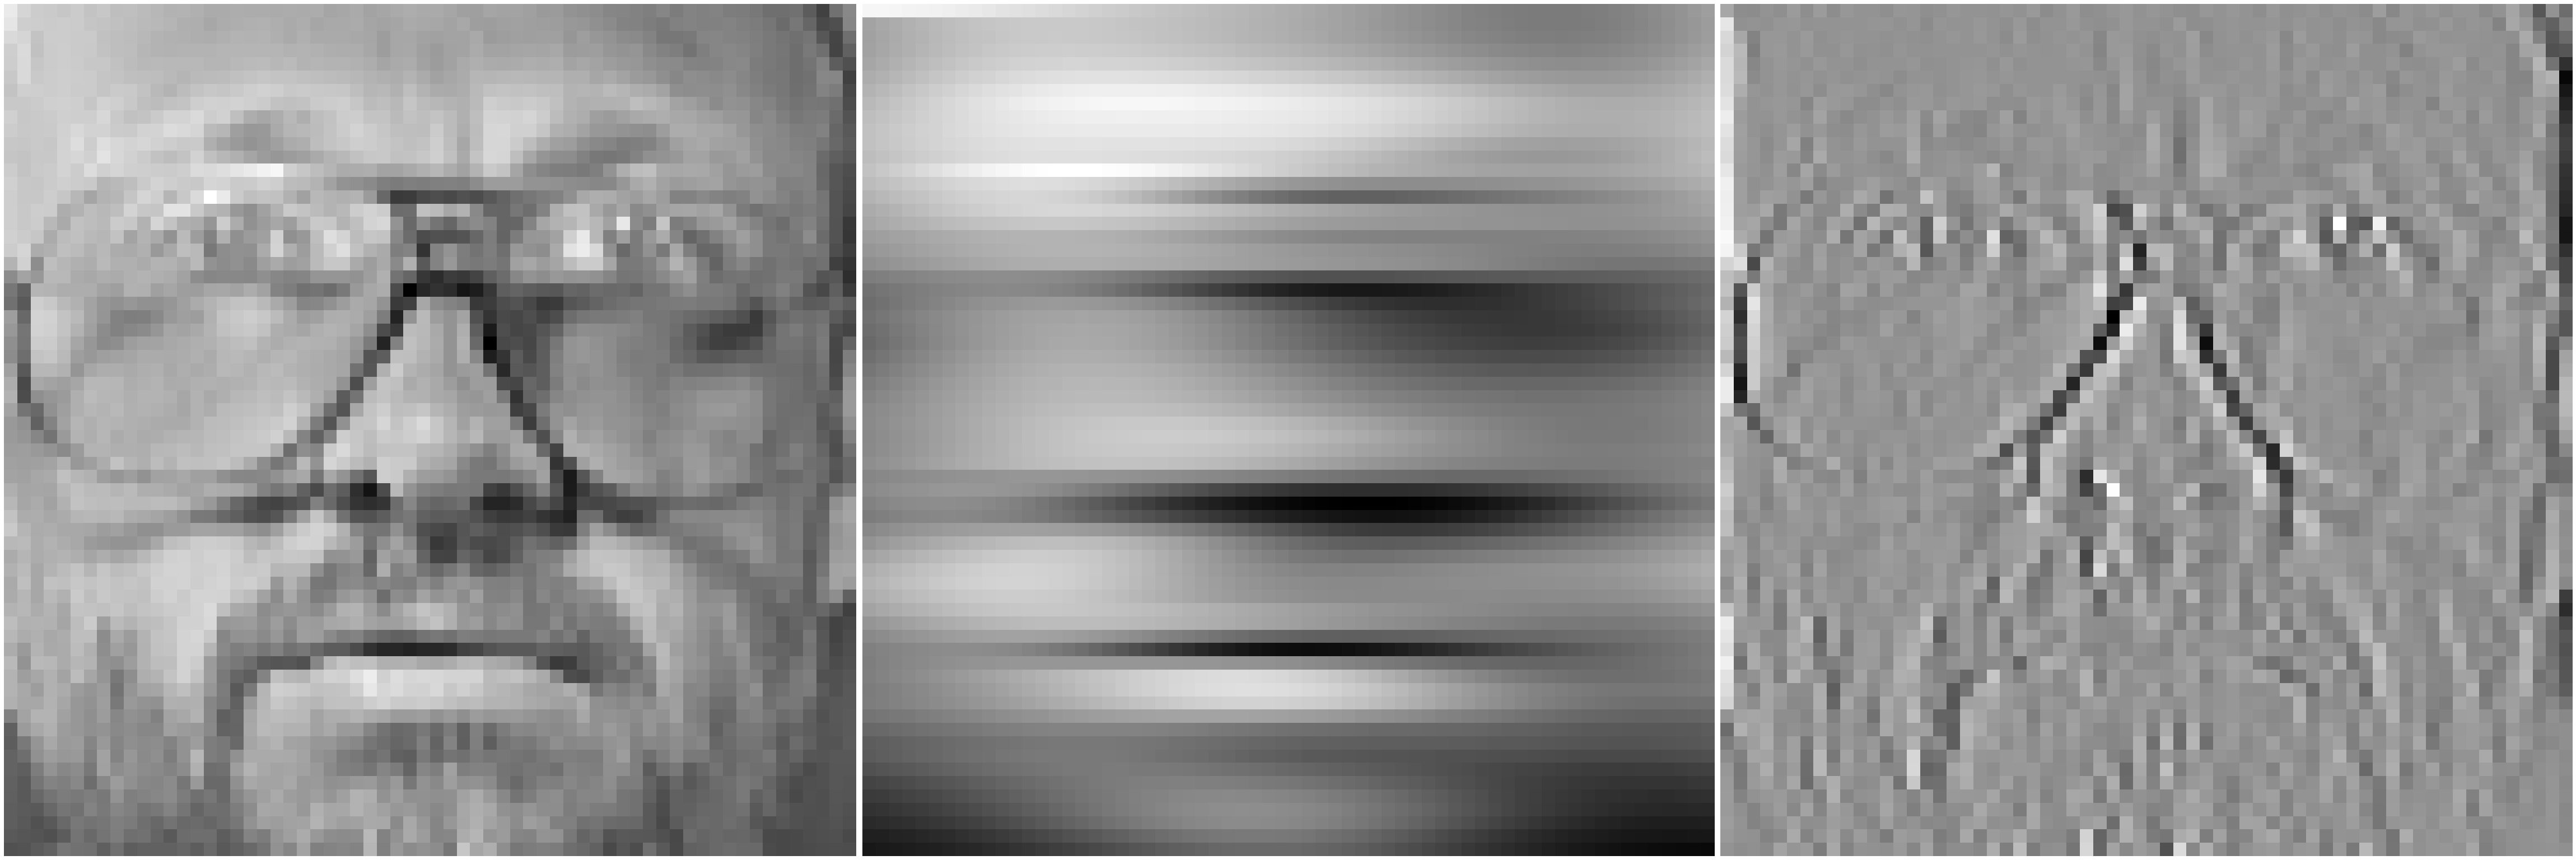

In [232]:
f, _ = get_face_images(1)
blurred_f = ndimage.gaussian_filter(f, 10)
alpha = 100
filter_blurred_f = ndimage.gaussian_filter(f, 1)
sharpened = f + alpha * (f - filter_blurred_f)

plt.figure(figsize=(64, 64))

plt.subplot(131)
plt.imshow(f.reshape(image_shape), cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(blurred_f.reshape(image_shape), cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened.reshape(image_shape), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [233]:
f

array([[ 0.27765974,  0.21050064,  0.1808518 , ..., -0.22626604,
        -0.22262967, -0.227702  ]], dtype=float32)

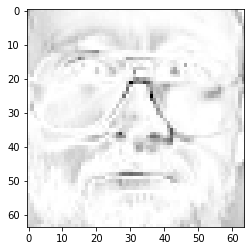

In [235]:
img, _ = get_face_images(num_images=1)
img = img*img*-1
plt.imshow(img.reshape(image_shape), cmap='gray')